# Vector embeddings with OpenAI

## Vector là gì

- Hiểu một cách đơn giản, vector là biểu diễn dưới dạng dãy số của dữ liệu (văn bản, hình ảnh, âm thanh) để huận tiện cho máy tính xử lý, tìm kiếm.
- Vector có thể được ứng dụng vào các tác vụ như tìm kiếm văn bản, tìm kiếm hình ảnh, hệ thống nhận dạng khuôn mặt, vân tay...
- Vector được tạo ra nhờ mô hình deep learning đã được huấn luyện

Ví dụ sau đây chuyển 1 một văn bản trở thành dạng vector với mô hình text-embedding-ada-002, sử dụng AzureOpenAI sdk

In [4]:
import os
import dotenv
import openai

dotenv.load_dotenv()
AZURE_OPENAI_SERVICE = os.getenv("AZURE_OPENAI_SERVICE")
# AZURE
AZURE_OPENAI_EMBEDDING_DEPLOYMENT = os.getenv("AZURE_OPENAI_EMBEDDING_DEPLOYMENT")

openai_client = openai.AzureOpenAI(
    api_version="2024-06-01",
    azure_endpoint=f"https://{AZURE_OPENAI_SERVICE}.openai.azure.com")


In [5]:
def get_embedding(sentence:str):
    response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=sentence)
    vector = response.data[0].embedding
    return vector

In [6]:
sentence = "A dog just walked past my house and yipped yipped like a Martian"
vector = get_embedding(sentence)

In [7]:
vector

[-0.01423619594424963,
 -0.0071890209801495075,
 -0.02720867283642292,
 0.012327720411121845,
 -0.0037782657891511917,
 0.022089315578341484,
 0.009626195766031742,
 -0.018027357757091522,
 -0.0006479790317825973,
 -0.025016503408551216,
 0.01601572148501873,
 -0.0027934021782130003,
 0.01059332862496376,
 -0.005583580583333969,
 0.011515328660607338,
 0.011657175607979298,
 0.023946210741996765,
 0.01013555284589529,
 0.016699161380529404,
 0.02705393172800541,
 -0.011025315150618553,
 0.022463273257017136,
 0.019303971901535988,
 -0.023546462878584862,
 -0.015409651212394238,
 -0.002952979179099202,
 0.021392978727817535,
 -0.015074377879500389,
 0.0009292535251006484,
 -0.009465007111430168,
 0.014081454835832119,
 -0.005967210046947002,
 -0.03871110454201698,
 0.005361140239983797,
 -0.02168956771492958,
 -0.020722433924674988,
 0.016531525179743767,
 -0.010748070664703846,
 0.009323161095380783,
 -0.023198293522000313,
 -0.005083895288407803,
 0.007479161024093628,
 0.005751216784

In [8]:
print("Vector có số chiều:", len(vector))

Vector có số chiều: 1536


Lưu ý: Số chiều của vector có thể khác nhau tùy theo mô hình mà chúng ta sử dụng.

Ví dụ với:
- text-embedding-ada-002 là 1536
- text-embedding-3-large là 3072

## Cosine Similarity
- Cosine similarity là một phép đo thường được sử dụng để đo mức độ tương tự giữa 2 vector
$$
\text{cosine similarity} = \frac{A \cdot B}{\|A\| \|B\|}
$$
- Được tính bằng tích vô hướng (dot product) của 2 vector chia cho tích độ dài của 2 vectors

In [9]:
import numpy as np
import pandas as pd

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

- Giá trị của cosine similarity nằm trong khoảng giá trị từ -1 tới 1
    - 1: Hai vector hoàn toàn giống nhau
    - 0: Hai vector vuông góc (không tương đồng)
    - -1: Hai vector hoàn toàn trái ngược

Ví dụ 2 vector gần giống nhau

In [10]:
# Định nghĩa các vector
A = np.array([0.5, 0.2])
B = np.array([0.4, 0.3])
print("Cosine similarity: ", cosine_similarity(A, B)) 

Cosine similarity:  0.9656157585206696


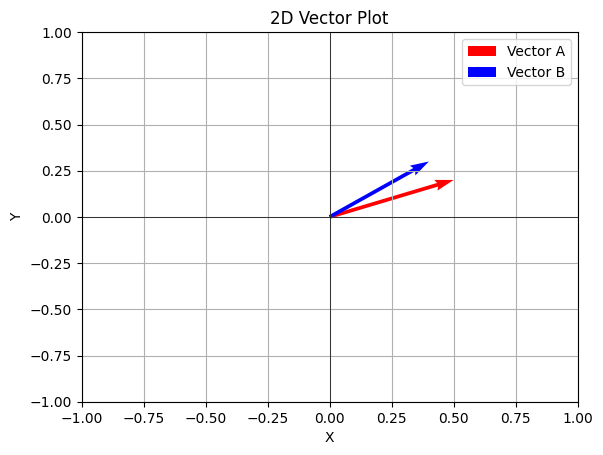

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo figure và axis
fig, ax = plt.subplots()

# Vẽ các vector
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Đặt giới hạn
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Thêm nhãn
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector Plot')
ax.legend()

# Hiển thị đồ thị
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


Ví dụ 2 vector khác nhau

Cosine similarity:  -0.8553596074489094


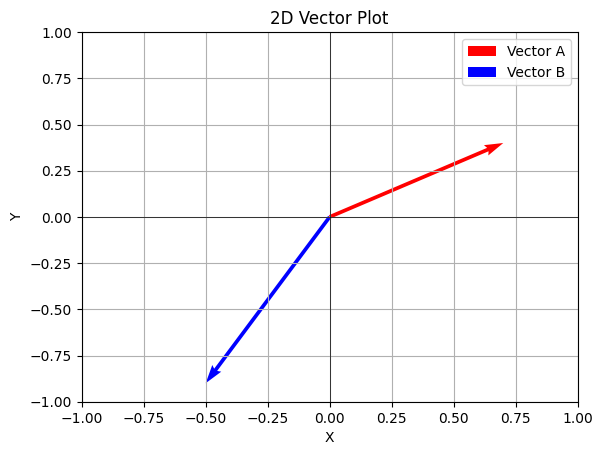

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các vector khác nhau
A = np.array([0.7, 0.4])
B = np.array([-0.5, -0.9])
print("Cosine similarity: ", cosine_similarity(A, B)) 
# Tạo figure và axis
fig, ax = plt.subplots()

# Vẽ các vector
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Đặt giới hạn
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Thêm nhãn
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector Plot')
ax.legend()

# Hiển thị đồ thị
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

### Ví dụ khác

In [13]:


sentences1 = ['The new movie is awesome',
             'The new movie is awesome',
             'The new movie is awesome']

sentences2 = ['The new movie is awesome',
              'This recent movie is so good',
              'djkshsjdkhfsjdfkhsd']

def get_embeddings(sentences):
    embeddings_response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=sentences)
    return [embedding_object.embedding for embedding_object in embeddings_response.data]

embeddings1 = get_embeddings(sentences1)
embeddings2 = get_embeddings(sentences2)

for i in range(len(sentences1)):
    print(f"{sentences1[i]} \t\t {sentences2[i]} \t\t Score: {cosine_similarity(embeddings1[i], embeddings2[i]):.4f}")

The new movie is awesome 		 The new movie is awesome 		 Score: 1.0000
The new movie is awesome 		 This recent movie is so good 		 Score: 0.9191
The new movie is awesome 		 djkshsjdkhfsjdfkhsd 		 Score: 0.7461


## Tìm kiếm vector

Giả sử chúng ta có danh sách bao gồm rất nhiều bộ phim.
Chúng ta cần xây dựng chương trình để tìm kiếm dựa vào tên phim do người dùng nhập vào.

In [14]:
movies = [
    "The Shawshank Redemption",
    "The Godfather",
    "The Dark Knight",
    "Pulp Fiction",
    "Schindler's List",
    "The Lord of the Rings: The Return of the King",
    "Forrest Gump",
    "Inception",
    "Fight Club",
    "The Matrix",
    "Goodfellas",
    "The Silence of the Lambs",
    "Saving Private Ryan",
    "Interstellar",
    "Gladiator",
    "The Lion King",
    "Titanic",
    "Avatar",
    "The Avengers",
    "Jurassic Park"
]

Tính toán các vector tương ứng cho từng tên phim

In [15]:
movie_vectors = get_embeddings(movies)

Các bước thực hiện sẽ là:
1. Với tên phim cần tìm (input query), chuyển sang dạng vector (query vector)
2. Với mỗi vector trong kho dữ liệu, tính toán mức độ tương đồng của query vector với từng vector đó
3. Chọn ra vector giống nhất (high similarity)

In [19]:
# Compute vector for query
query = "Công viên kỷ Jura"

embeddings_response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=[query])
vector = embeddings_response.data[0].embedding

# Compute cosine similarity between query and each movie title
scores = []
for i, movie in enumerate(movie_vectors):
    scores.append((movies[i], cosine_similarity(vector, movie)))

# Display the top 10 results
df = pd.DataFrame(scores, columns=['Movie', 'Score'])
df = df.sort_values('Score', ascending=False)
df.head(10)

Movie     Score
19             Jurassic Park  0.786649
6               Forrest Gump  0.743784
16                   Titanic  0.743263
18              The Avengers  0.741117
14                 Gladiator  0.740187
13              Interstellar  0.736559
17                    Avatar  0.735848
11  The Silence of the Lambs  0.735457
15             The Lion King  0.733070
7                  Inception  0.732684

## Vấn đề performance

Giả sử số lượng phim trong dữ liệu lên tới hàng triệu phim thì việc tìm kiếm tuần tự như trên sẽ không còn hoạt động tốt.

Cần phải có một cơ chế tốt hơn để tìm kiếm với dữ liệu lớn.